### Imports


In [1]:
# imports
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum

from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

### Setting up our data

In [2]:
# settings
PATH = 'G:/Shared drives/COGS18/NSP1_array1_LFP.mat'
FS = 500 # sampling frequency (Hz)
CHAN = 3 # example channel

# load data
data_in = loadmat(PATH)

# get lfp data 
lfp = data_in['lfp']

# create time-vector
n_seconds = lfp.shape[0]/FS
time = create_times(n_seconds, FS)
print(time.shape)

# show
print(f"N channels: \t\t{lfp.shape[1]}")
print(f"Signal duration: \t{n_seconds} (s)")

(78644,)
N channels: 		64
Signal duration: 	157.288 (s)


### Spectral Analysis

(78644,)


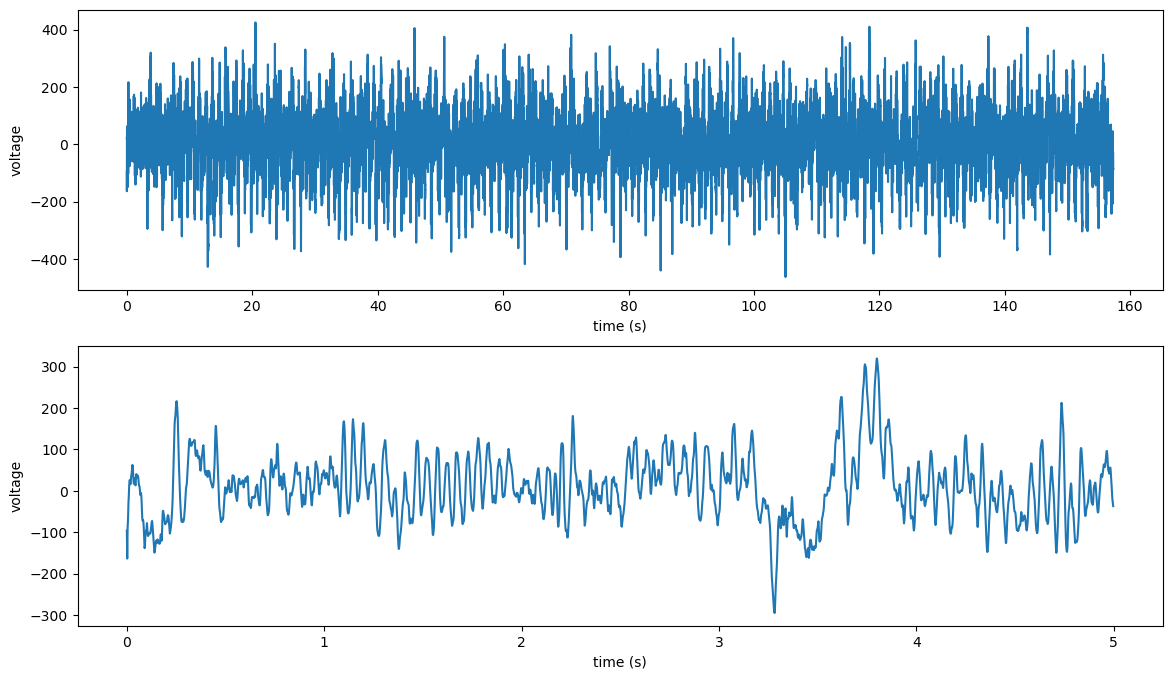

In [3]:
# get signal for an example channel
signal = lfp[:,CHAN]
print(signal.shape)

# plot example signal
fig, (ax1, ax2) = plt.subplots(2,1, figsize=[14,8])
ax1.plot(time, signal)

# plot snippet of signal
time2plot = 5 # sec
ax2.plot(time[:time2plot*FS], signal[:time2plot*FS])

# label plots
for ax in [ax1, ax2]:
    ax.set(xlabel='time (s)', ylabel='voltage')

In [5]:
def plot_signal_and_power(time, signal, freq, spectrum, title='', logscale=False, xlims=None):
    '''
    Plot time-series and corresponding power spectum

    '''
    # create figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)
    fig.suptitle(title)

    # plot signal
    ax1.set(xlabel='time (s)', ylabel='voltage (au)', title='Time-series')
    ax1.plot(time, signal)
    if xlims:
        ax1.set_xlim(xlims)
        
    # plot spectra
    ax2.set(xlabel='frequency (Hz)', ylabel='power (au)', title='Power Spectral Density')
    ax2.plot(freq, spectrum);
    ax2.set_xlim([.1,200])
    if logscale:
        ax2.set(xscale='log', yscale='log')


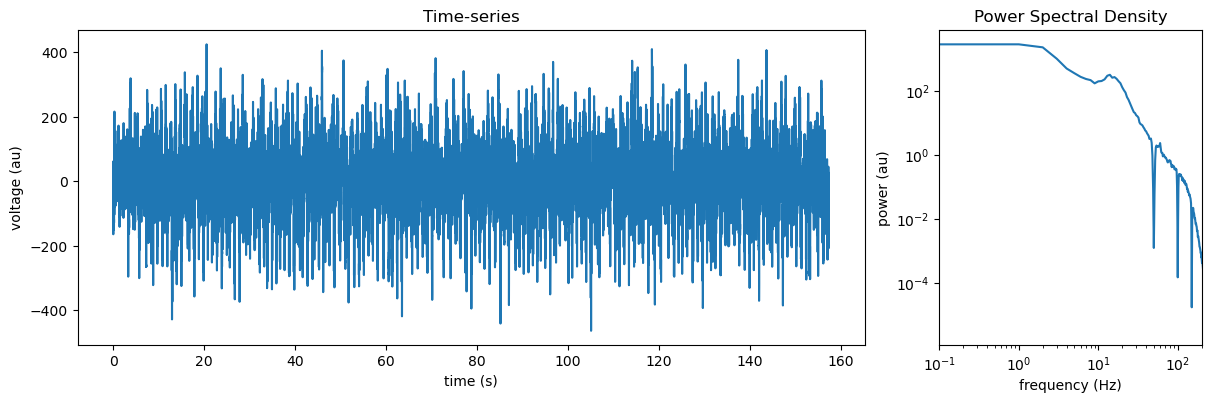

In [6]:
# compute power spectrum
freq, psd = compute_spectrum(signal, FS)

# plot
plot_signal_and_power(time, signal, freq, psd, logscale=True)